# K-Means Clustering: Euclidean vs Mahalanobis distances

In [6]:
from sklearn import datasets
from kmeans_euclidean import KMeansEuclidean
from kmeans_mahalanobis import KMeansMahalanobis
from kmeans_sphered import KMeansSpheredData
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

<p style="text-align: justify">This work aims to compare the performance of the K-Means algorithm using the Mahalanobis distance instead of the standard Euclidean distance on 2 dimensional linearly correlated elliptical data.</p>

### 1. Dataset creation

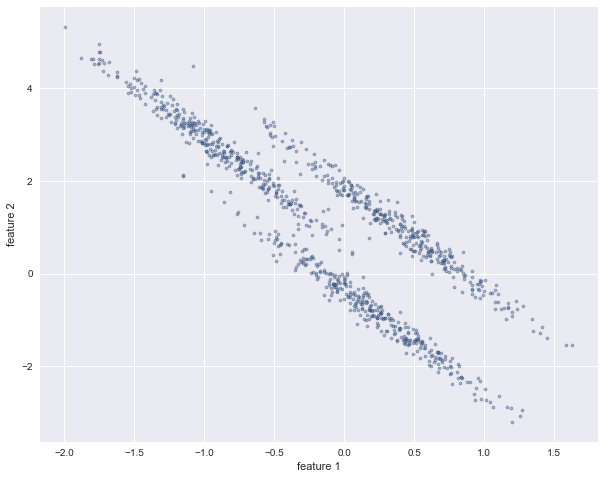

In [7]:
x, y = datasets.make_blobs(n_samples=1000, random_state=170) #define synthetic dataset
x = np.dot(x, [[0.2, -0.6], [-0.4, 0.8]])
#plot data
plt.figure(figsize=(10,8))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(x[:, 0], x[:, 1], marker='o', s=10, edgecolor='k', alpha=0.5);

### 2. K-Means with Euclidean distance

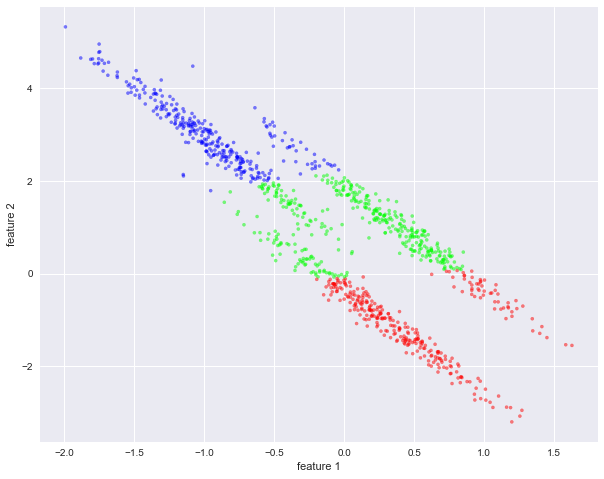

In [8]:
kmeans_euclidean = KMeansEuclidean(3)
y_kmeans_euclidean = kmeans_euclidean.fit(x).predict(x) # assign each smaple to a cluster

#plot results
plt.figure(figsize=(10,8))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_euclidean, s=10, cmap='brg', alpha=0.5);

### 3. K-Means applied to "whitened" data

<p style="text-align: justify">Another approach tested was to apply linear dimensionality reduction to project the data in a lower dimensional space and "whiten" it to ensure that variables are uncorrelated. That was done with the aid of sklearn's Principal Component Analysis (PCA). This transformed data feeds a k means algorithm equipped with Euclidean distance. This implementation is based on the fact that the computation of Mahalanobis distance is equivalent to the computation of the Euclidean distance in the whitened space (Younis, 1996). Results are satisfying and improved when compared to standard k means clustering.</p>

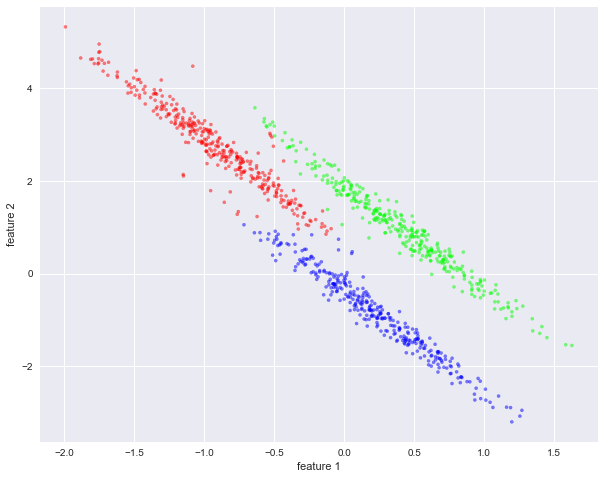

In [9]:
kmeans_trans = KMeansSpheredData(3)
y_kmeans_trans = kmeans_trans.fit(x).predict(x)

#plot results
plt.figure(figsize=(10,8))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_trans, s=10, cmap='brg', alpha=0.5);

### 4. K-Means with Mahalanobis distance

<p style="text-align: justify">Based on these experimental results, K-Means operating with Mahalanobis distance works undoubtedly better than K-Means equipped with Euclidean distance and standard centroid cluster representatives for linearly correlated elliptical data.</p>

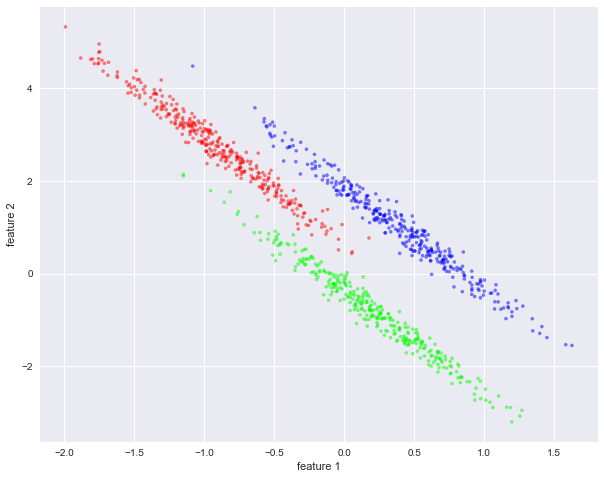

In [10]:
kmeans_mahalanobis = KMeansMahalanobis(3)
y_kmeans_mahalanobis = kmeans_mahalanobis.fit(x).predict(x)

#plot results
plt.figure(figsize=(10,8))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_mahalanobis, s=10, cmap='brg', alpha=0.5);